## Table of content for blog series

* **`Importing libraries`**
* **`Bar plot`**
    * Basics of barplot
    * Dodged barplot
        * Dodged barplot [`matplotlib style`]
        * Dodged barplot [`pandas and matplotlib style`]
        * Dodged barplot `with pandas DataFrame` [`seaborn style`]

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Basic bar plot using Rectangle method

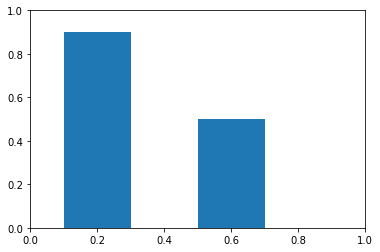

In [2]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

# Define rectangle
# Rectangle(xy, width, height)
rec1 = Rectangle((0.1, 0), 0.2, 0.9)
rec2 = Rectangle((0.5, 0), 0.2, 0.5)

# Adding patch object/ rectangles
ax.add_patch(rec1)
ax.add_patch(rec2)

In [3]:
# help(Rectangle)

In [4]:
ax.patches

<Axes.ArtistList of 2 patches>

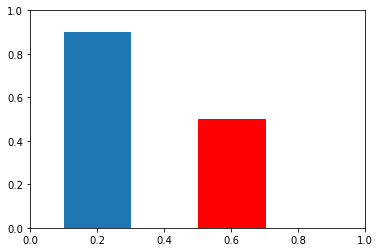

In [5]:
ax.patches[1].set_color("red")
fig

<BarContainer object of 5 artists>

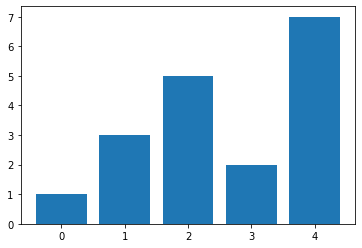

In [6]:
# Adding bars using defined values

fig, ax = plt.subplots()

x = [0, 1, 2, 3, 4]
y = [1, 3, 5, 2, 7]

# Use ax.bar()
ax.bar(x, y)

In [7]:
# Check number of patches
ax.patches

<Axes.ArtistList of 5 patches>

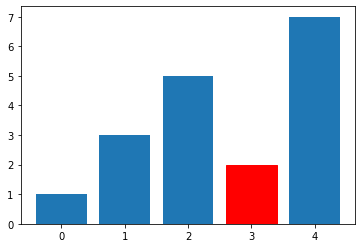

In [8]:
# Changing 4th patch color to "red"

# Cahnge patch 1 to red
ax.patches[3].set_color("red")
fig

### Dodged barplot [matplotlib style]

In [9]:
tips = pd.read_csv("datasets/tips.csv")
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


##### Estimate sex wise smoker percentage 
* Where, `sex` should be in `index` and `smoker` labels should `columns`

In [10]:
df = (tips
      .groupby("sex")["smoker"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
df

smoker,No,Yes
sex,,
Female,62.07,37.93
Male,61.78,38.22


In [11]:
# Generating labels and index
label = df.index
x = np.arange(len(label))
print(label)
print(x)

Index(['Female', 'Male'], dtype='object', name='sex')
[0 1]


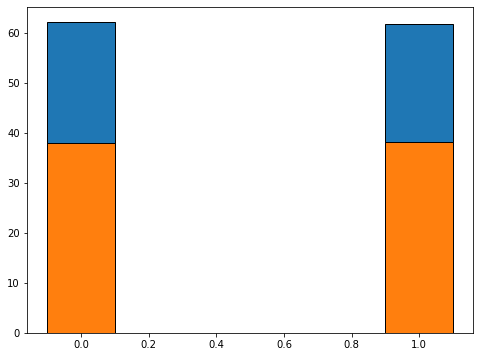

In [13]:
#create the base axis
fig, ax = plt.subplots(figsize = (8,6))

#set the width of the bars
width = 0.2

#create the first bar -width/2
rect1 = ax.bar(x,
              df["No"],
              width = width, 
               label = "No",
               edgecolor = "black")

# #create the second bar using +width/2
rect2 = ax.bar(x,
              df["Yes"],
              width = width,
              label = "Yes",
              edgecolor = "black")

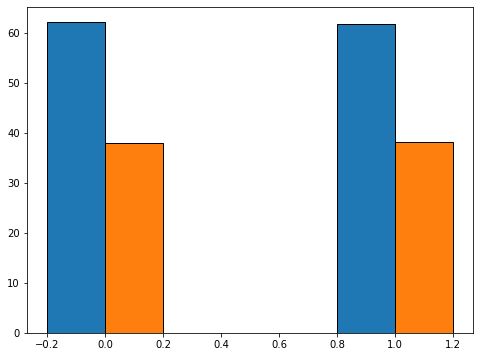

In [15]:
#create the base axis
fig, ax = plt.subplots(figsize = (8,6))

#set the width of the bars
width = 0.2

# create the first bar by shifting it to left side by width/2
rect1 = ax.bar(x - width/2,
              df["No"],
              width = width, 
               label = "No",
               edgecolor = "black")

# create the first bar by shifting it to right side by width/2
rect2 = ax.bar(x + width/2,
              df["Yes"],
              width = width,
              label = "Yes",
              edgecolor = "black")

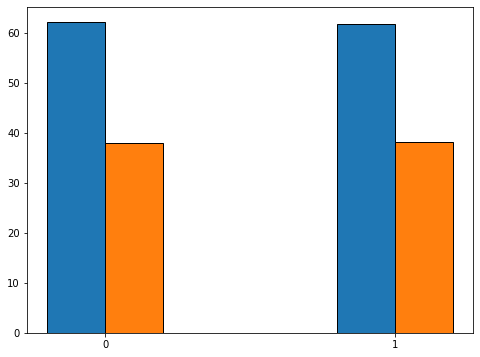

In [16]:
# Reset x-ticks
ax.set_xticks(x)
fig

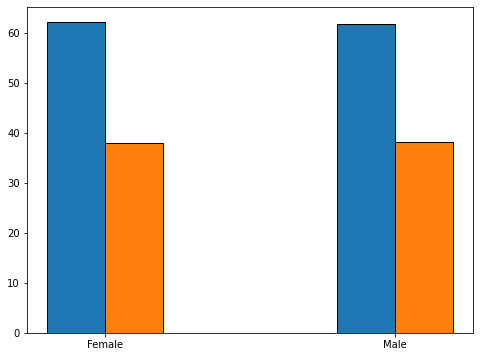

In [17]:
# Setting x-axis tick labels
ax.set_xticklabels(label)
fig

In [18]:
# Number of patches
ax.patches

<Axes.ArtistList of 4 patches>

In [19]:
ax.patches[0].get_height() # 0 & 1 are blue pair; 2 & 3 are orange pair

62.07

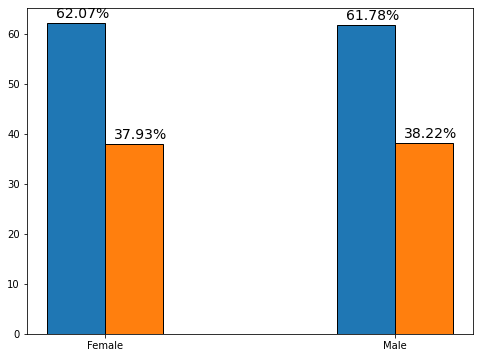

In [20]:
# Adding bar values
for p in ax.patches:
    t = ax.annotate(str(p.get_height()) + "%", xy = (p.get_x() + 0.03, p.get_height()+ 1))
    t.set(color = "black", size = 14)

fig

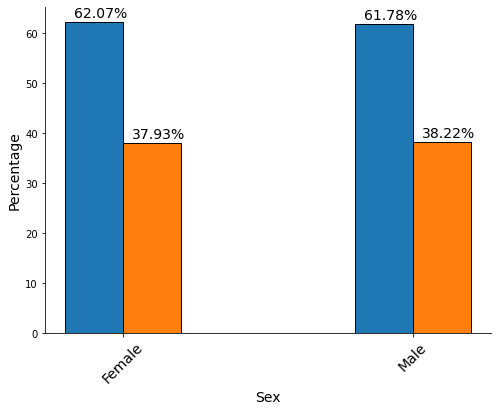

In [21]:
# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

# Add tick labels
ax.tick_params(axis = "x", labelsize = 14, labelrotation = 45)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Sex", size = 14)

fig

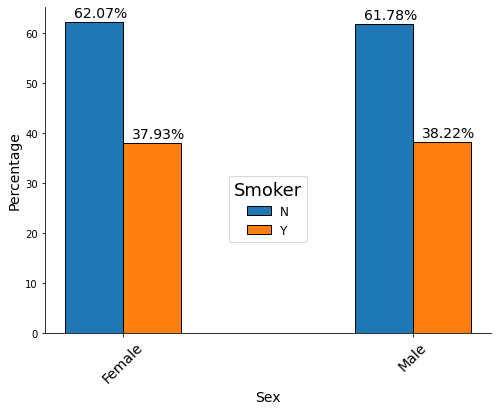

In [22]:
# Customize legend
ax.legend(labels = ["N", "Y"],
          fontsize = 12,
          title = "Smoker",
          title_fontsize = 18)

# # Fix legend position
ax.legend_.set_bbox_to_anchor([0.6, 0.5])

fig

In [23]:
# Save figure object
fig.savefig("images/dodged_barplot.png", dpi = 300)

### Dodged bar plot with pandas DataFrame [matplotlib style]

In [24]:
tips = pd.read_csv("datasets/tips.csv")

df = (tips
      .groupby("sex")["smoker"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
df

smoker,No,Yes
sex,,
Female,62.07,37.93
Male,61.78,38.22


##### Generate plot using DataFrame object

<AxesSubplot:xlabel='sex'>

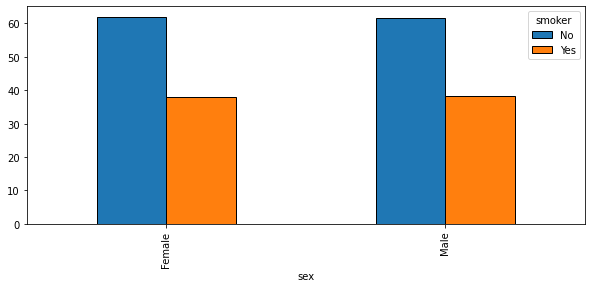

In [25]:
fig, ax = plt.subplots(figsize = (10, 4))

df.plot(kind = "bar",
        ax = ax,
        edgecolor = "black")

#### Customising plot

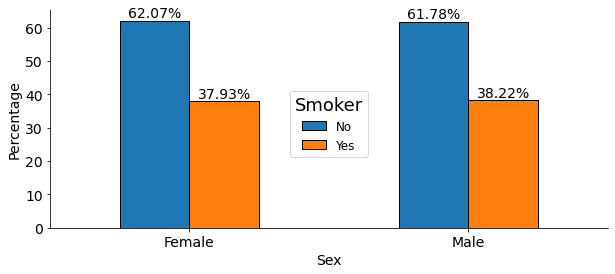

In [26]:
# Add data labels
for p in ax.patches:
    t = ax.annotate(str(p.get_height()) + "%", xy = (p.get_x() + 0.03, p.get_height()+ 1))
    t.set(color = "black", size = 14)

# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

# Add axis labels and tick parameters
ax.set_xlabel("Sex", size = 14)
ax.set_ylabel("Percentage", size = 14)
ax.tick_params(labelsize = 14, labelrotation = 0)

# Customise legend
ax.legend(labels = ["No", "Yes"],
          fontsize = 12,
          title = "Smoker",
          title_fontsize = 18)

# Fix legend position
ax.legend_.set_bbox_to_anchor([0.5, 0.3])
fig

### Dodged barplot with pandas DataFrame [`seaborn style`]

In [31]:
df = (
    tips
    .groupby("sex")["smoker"]
    .value_counts(normalize = True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .round(2)
)

df

,sex,smoker,percent
0,Female,No,62.07
1,Female,Yes,37.93
2,Male,No,61.78
3,Male,Yes,38.22


#### Plotting the bar using seaborn's catplot

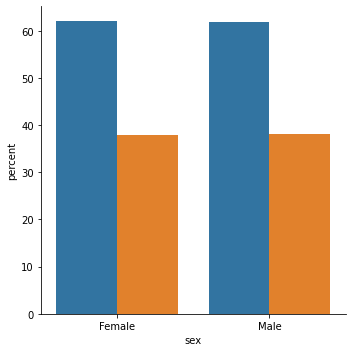

In [32]:
sns.catplot(x = "sex",
            y = 'percent',
            hue = "smoker",
            kind = 'bar',
            data = df,
            legend = False)

ax = plt.gca()
fig = plt.gcf()

#### Customising the bar plot

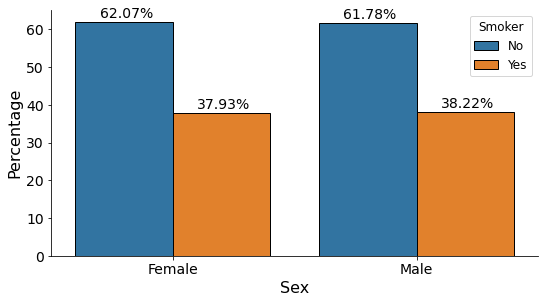

In [33]:
sns.catplot(x = "sex",
            y = 'percent',
            hue = "smoker",
            kind='bar',
            data = df,
            legend = False)

################################
# Customisation
################################

# Retrive axis and fig objects from the current plot environment
ax = plt.gca()
fig = plt.gcf()

# Add bar labels
for p in ax.patches:
    p.set_edgecolor("black") # Add black border across all bars
    t = ax.annotate(str(p.get_height().round(2)) + "%", xy = (p.get_x() + 0.1, p.get_height() + 1))
    t.set(size = 14)

# Adding bar labels and tick parameters
ax.set_xlabel("Sex", size = 16)
ax.set_ylabel("Percentage", size = 16)
ax.tick_params(labelsize = 14)

# Legend customisation
ax.legend(fontsize = 12,
          title = "Smoker",
          title_fontsize = 12)

# Resetting figure size
fig.set_size_inches(8, 4)